In [1]:
import numpy as np
import random
import json

In [2]:
#Basic tic tac toe class
class ttt:
    def __init__(self):
        self.board = np.array([None] * 9)

    @staticmethod
    def check_for_win(board):
        WIN_STATES = [
            (0,1,2),
            (3,4,5),
            (6,7,8),
            (0,3,6),
            (1,4,7),
            (2,5,8),
            (0,4,8),
            (2,4,6)
        ]

        for a, b, c in WIN_STATES:
            if board[a] == board[b] == board[c] and board[a] == 1:
                return 100
            elif board[a] == board[b] == board[c] and board[a] == 2:
                return -100
        if len(ttt.legal_moves(board)) == 0:
            return 50
        else:
            return 0
    
    @staticmethod
    def legal_moves(board):
        return np.asarray(np.where(board == None)).flatten()

    def update_board(self, player, move):
        self.board[move] = player
        return self.check_for_win(self.board)      

    @staticmethod
    def display_board(board):
        def convert_board(board):
            readable_board = [' '] * 9
            for i in range(len(board)):
                if board[i] == 1:
                    readable_board[i] = 'X'
                elif board[i] == 2:
                    readable_board[i] = 'O'
            return readable_board
        board = convert_board(board)
        print(' {:1} | {:1} | {:1}'.format(board[0],board[1],board[2]))
        print('-----------')
        print(' {:1} | {:1} | {:1}'.format(board[3],board[4],board[5]))
        print('-----------')
        print(' {:1} | {:1} | {:1}'.format(board[6],board[7],board[8]))

In [3]:
from IPython.display import display, HTML
from base64 import b64encode
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt

def display_ai(board, q):
    def convert_board(board):
            readable_board = [' '] * 9
            for i in range(len(board)):
                if board[i] == 1:
                    readable_board[i] = 'X'
                elif board[i] == 2:
                    readable_board[i] = 'O'
                else:
                    readable_board[i] = '&blk14;'
            return readable_board
    board = convert_board(board)    
    heatmap = [[q[0], q[1], q[2]], [q[3], q[4], q[5]], [q[6], q[7], q[8]]]
    board = ['{:1} | {:1} | {:1}'.format(board[0],board[1],board[2]),
             '-----------',
             '{:1} | {:1} | {:1}'.format(board[3],board[4],board[5]),
             '-----------',
             '{:1} | {:1} | {:1}'.format(board[6],board[7],board[8])]
    
    hm = sns.heatmap(heatmap, cmap=sns.diverging_palette(10, 220, sep=80, n=100), cbar_kws={'label': 'Expected Reward'})
    figdata = BytesIO()
    plt.savefig(figdata, format='png')
    plt.clf()
    datatable = '<table><tr><td>{1}<br/>{2}<br/>{3}<br/>{4}<br/>{5}</td><td><img src="data:image/png;base64,{0}"/></td></tr></table>'.format(b64encode(figdata.getvalue()).decode(),
                                                                                                                                             board[0], board[1], board[2], board[3], board[4])
    display(HTML(datatable))     

In [4]:
def human_play():
#     or 'aifirst.json'
#     or 'qtables.json'
    with open('randomfirst.json') as f:
        q = json.load(f)
    game = ttt()

    def p_turn(game):
        def new_q(q, moves):
            new_q = [0] * 9
            for i in range(len(q)):
                if i not in moves:
                    new_q[i] = -200
                else:
                    new_q[i] = q[i]
            return new_q

        legal_moves = ttt.legal_moves(game.board)
        old_board = game.board.copy() 
        display_ai(old_board, q[str(old_board)])
#         print(q[str(game.board)])       
        move = np.argmax(new_q(q[str(game.board)], legal_moves))
        game.update_board(1, move)

    def h_turn(game):
        ttt.display_board(game.board)
        move = input('Where would you like to play (0-8): ')
        game.update_board(2, int(move))

    first = random.randint(1,2)
#     Switch these out for AI first or random first
#     p_order = [1, 2]
    p_order = [first, 3-first]
    while (ttt.check_for_win(game.board) == 0):
        if (p_order[0] == 1):
            p_turn(game)
        else:
            h_turn(game)
        if (ttt.check_for_win(game.board) != 0):
            ttt.display_board(game.board)
            break
        if (p_order[0] == 1):
            h_turn(game)
        else:
            p_turn(game)
            
    print()
    if (ttt.check_for_win(game.board) == 100):
        print('AI wins')
    elif (ttt.check_for_win(game.board) == -100):
        print('You somehow beat the AI')
    else:
        print('You both played a perfect game. Tie')

   |   |  
-----------
   |   |  
-----------
   |   |  
Where would you like to play (0-8): 7


░ | ░ | ░-----------░ | ░ | ░-----------░ | O | ░,

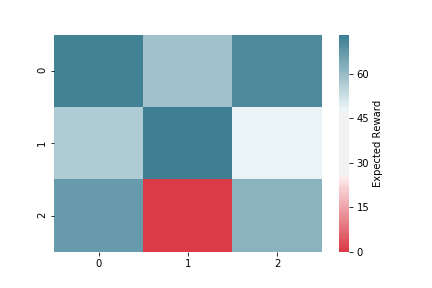

   |   |  
-----------
   | X |  
-----------
   | O |  
Where would you like to play (0-8): 8


░ | ░ | ░-----------░ | X | ░-----------░ | O | O,

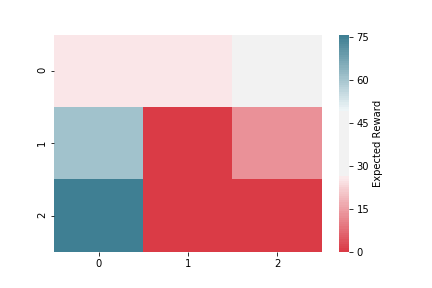

   |   |  
-----------
   | X |  
-----------
 X | O | O
Where would you like to play (0-8): 0


O | ░ | ░-----------░ | X | ░-----------X | O | O,

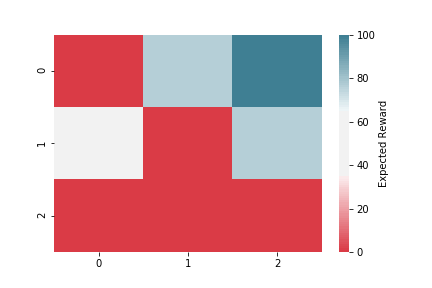


AI wins


<Figure size 432x288 with 0 Axes>

In [5]:
human_play()